** 2 COUPLED reactions:  A + B <-> C  and  C + D <-> E , with 1st-order kinetics for each species,
taken to equilibrium**

Both reactions are stronger in their respective forward rates.  For the most part, "C" is produced by the 1st reaction, and consumed by the 2nd one

Diffusion not applicable (just 1 bin)

LAST REVISED: Aug. 12, 2022

In [1]:
# Extend the sys.path variable, to contain the project's root directory
import set_path
set_path.add_ancestor_dir_to_syspath(3)  # The number of levels to go up 
                                         # to reach the project's home, from the folder containing this notebook

Added 'D:\Docs\- MY CODE\BioSimulations\life123-Win7' to sys.path


In [2]:
from experiments.get_notebook_info import get_notebook_basename

from modules.chemicals.chemicals import Chemicals as chem
from modules.reactions.reactions import Reactions
from life_1D.bio_sim_1d import BioSim1D as bio

import plotly.express as px
from modules.html_log.html_log import HtmlLog as log
from modules.visualization.graphic_log import GraphicLog

In [3]:
# Initialize the HTML logging
log_file = get_notebook_basename() + ".log.htm"    # Use the notebook base filename for the log file

# Set up the use of some specified graphic (Vue) components
GraphicLog.config(filename=log_file,
                  components=["vue_cytoscape_1"],
                  extra_js="https://cdnjs.cloudflare.com/ajax/libs/cytoscape/3.21.2/cytoscape.umd.js",
                  home_rel_path="../../..")    # relative path is from the location of THE LOG FILE to the project's home

-> Output will be LOGGED into the file 'reaction_8.log.htm'


In [4]:
# Initialize the system
chem_data = chem(names=["A", "B", "C", "D", "E"])     # NOTE: Diffusion not applicable (just 1 bin)

# Specify the reactions
rxn = Reactions(chem_data)

# Reactions A + B <-> C  and  C + D <-> E , with 1st-order kinetics for each species
rxn.add_reaction(reactants=["A", "B"], products=["C"], forward_rate=5., reverse_rate=2.)
rxn.add_reaction(reactants=["C", "D"], products=["E"], forward_rate=8., reverse_rate=4.)

bio.initialize_system(n_bins=1, chem_data=chem_data, reactions=rxn)

bio.set_all_uniform_concentrations( [3., 5., 1., 0.4, 0.1] )

bio.describe_state()

SYSTEM STATE at Time t = 0:
1 bins and 5 species:
  Species 0 (A). Diff rate: NOT SET. Conc:  [3.]
  Species 1 (B). Diff rate: NOT SET. Conc:  [5.]
  Species 2 (C). Diff rate: NOT SET. Conc:  [1.]
  Species 3 (D). Diff rate: NOT SET. Conc:  [0.4]
  Species 4 (E). Diff rate: NOT SET. Conc:  [0.1]


In [5]:
# Save the state of the concentrations of all species at bin 0
bio.save_snapshot(bio.bin_snapshot(bin_address = 0))
bio.get_history()

,A,B,C,D,E,SYSTEM TIME
0,3.0,5.0,1.0,0.4,0.1,0


In [6]:
rxn.describe_reactions()

Number of reactions:  2
0: A + B <-> C  (Rf = 5.0 / Rb = 2.0)
1: C + D <-> E  (Rf = 8.0 / Rb = 4.0)


In [7]:
# Send a header and a plot to the HTML log file
log.write("2 COUPLED reactions:  A + B <-> C  and  C + D <-> E",
          style=log.h2)
# Send the plot to the HTML log file
graph_data = rxn.prepare_graph_network()
GraphicLog.export_plot(graph_data, "vue_cytoscape_1")

2 COUPLED reactions:  A + B  C  and  C + D  E

 {'reactants': [(1, 0, 1), (1, 1, 1)], 'products': [(1, 2, 1)], 'Rf': 5.0, 'Rb': 2.0} 


 {'reactants': [(1, 2, 1), (1, 3, 1)], 'products': [(1, 4, 1)], 'Rf': 8.0, 'Rb': 4.0} 

[GRAPHIC ELEMENT SENT TO LOG FILE `reaction_8.log.htm`]


### <a name="sec_2_first_step"></a>First step

In [8]:
# First step
bio.react(time_step=0.01, n_steps=1)
bio.describe_state()

SYSTEM STATE at Time t = 0.01:
1 bins and 5 species:
  Species 0 (A). Diff rate: NOT SET. Conc:  [2.27]
  Species 1 (B). Diff rate: NOT SET. Conc:  [4.27]
  Species 2 (C). Diff rate: NOT SET. Conc:  [1.702]
  Species 3 (D). Diff rate: NOT SET. Conc:  [0.372]
  Species 4 (E). Diff rate: NOT SET. Conc:  [0.128]


1 bins and 5 species:
 [[2.27 ]
 [4.27 ]
 [1.702]
 [0.372]
 [0.128]]

In [9]:
# Save the state of the concentrations of all species at bin 0
bio.save_snapshot(bio.bin_snapshot(bin_address = 0))
bio.get_history()

,A,B,C,D,E,SYSTEM TIME
0,3.00,5.00,1.000,0.400,0.100,0.00
1,2.27,4.27,1.702,0.372,0.128,0.01


In [10]:
# Identical 2nd step
bio.react(time_step=0.01, n_steps=1)
bio.describe_state()

SYSTEM STATE at Time t = 0.02:
1 bins and 5 species:
  Species 0 (A). Diff rate: NOT SET. Conc:  [1.819395]
  Species 1 (B). Diff rate: NOT SET. Conc:  [3.819395]
  Species 2 (C). Diff rate: NOT SET. Conc:  [2.10707348]
  Species 3 (D). Diff rate: NOT SET. Conc:  [0.32646848]
  Species 4 (E). Diff rate: NOT SET. Conc:  [0.17353152]


1 bins and 5 species:
 [[1.819395  ]
 [3.819395  ]
 [2.10707348]
 [0.32646848]
 [0.17353152]]

In [11]:
# Save the state of the concentrations of all species at bin 0
bio.save_snapshot(bio.bin_snapshot(bin_address = 0))
bio.get_history()

,A,B,C,D,E,SYSTEM TIME
0,3.000000,5.000000,1.000000,0.400000,0.100000,0.00
1,2.270000,4.270000,1.702000,0.372000,0.128000,0.01
2,1.819395,3.819395,2.107073,0.326468,0.173532,0.02


### <a name="sec_2"></a>Numerous more steps

In [12]:
# Numerous more identical steps, to equilibrium
bio.react(time_step=0.01, n_steps=200)
bio.describe_state()

SYSTEM STATE at Time t = 2.020000000000001:
1 bins and 5 species:
  Species 0 (A). Diff rate: NOT SET. Conc:  [0.50508029]
  Species 1 (B). Diff rate: NOT SET. Conc:  [2.50508029]
  Species 2 (C). Diff rate: NOT SET. Conc:  [3.16316668]
  Species 3 (D). Diff rate: NOT SET. Conc:  [0.06824696]
  Species 4 (E). Diff rate: NOT SET. Conc:  [0.43175304]


1 bins and 5 species:
 [[0.50508029]
 [2.50508029]
 [3.16316668]
 [0.06824696]
 [0.43175304]]

### <a name="sec_2_equilibrium"></a>Equilibrium

In [13]:
# Do a consistent check with the equilibrium concentrations:

A_eq = bio.bin_concentration(0, 0)
B_eq = bio.bin_concentration(0, 1)
C_eq = bio.bin_concentration(0, 2)
D_eq = bio.bin_concentration(0, 3)
E_eq = bio.bin_concentration(0, 4)

Rf0 = rxn.get_forward_rate(0)
Rb0 = rxn.get_reverse_rate(0)

Rf1 = rxn.get_forward_rate(1)
Rb1 = rxn.get_reverse_rate(1)

equil = -(Rf0 * A_eq * B_eq - Rf1 * C_eq * D_eq) + (Rb0 * C_eq - Rb1 * E_eq)

print("\nAt equilibrium: ", equil, " (this should be close to 0 at equilibrium)")


At equilibrium:  -2.6645352591003757e-15  (this should be close to 0 at equilibrium)


In [14]:
# Save the state of the concentrations of all species at bin 0
bio.save_snapshot(bio.bin_snapshot(bin_address = 0))
bio.get_history()

,A,B,C,D,E,SYSTEM TIME
0,3.000000,5.000000,1.000000,0.400000,0.100000,0.00
1,2.270000,4.270000,1.702000,0.372000,0.128000,0.01
2,1.819395,3.819395,2.107073,0.326468,0.173532,0.02
3,0.505080,2.505080,3.163167,0.068247,0.431753,2.02


# Plots of changes of concentration with time

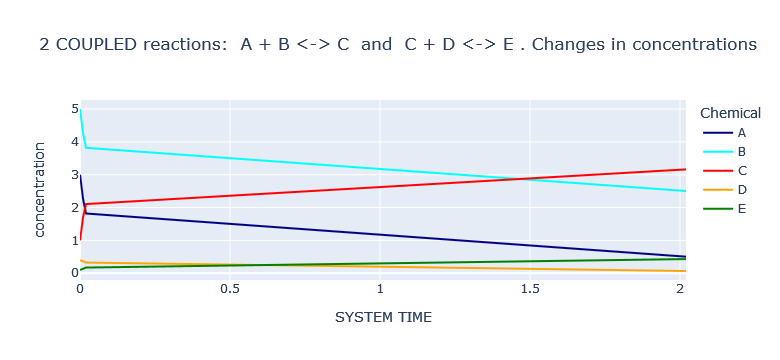

In [16]:
fig = px.line(data_frame=bio.get_history(), x="SYSTEM TIME", y=["A", "B", "C", "D", "E"], 
              title="2 COUPLED reactions:  A + B <-> C  and  C + D <-> E . Changes in concentrations",
              color_discrete_sequence = ['navy', 'cyan', 'red', 'orange', 'green'],
              labels={"value":"concentration", "variable":"Chemical"})
fig.show()

A and B get consumed.  
C gets produced by the 1st reaction more quickly than consumed by the 2nd one.
D gets consumed, while E gets produced.